
# Dataset Information

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we would use the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Loading Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Dataset Information

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Preprocessing the dataset

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Distribution of Legit and Fraud data

0    284315
1       492
Name: Class, dtype: int64

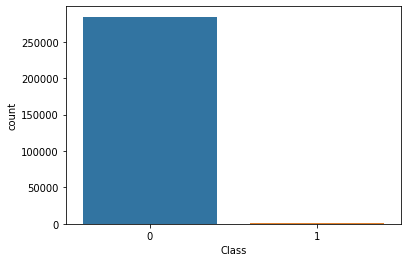

In [6]:
sns.countplot(df['Class'])
df['Class'].value_counts()

## This shows that the dataset is highly imbalanced and, thus, over-sampling and under-sampling of the data will be required.

In [7]:
df_temp = df.drop(columns=['Time','Amount','Class'],axis=1)
df_temp.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


## Exploratory Data Analysis

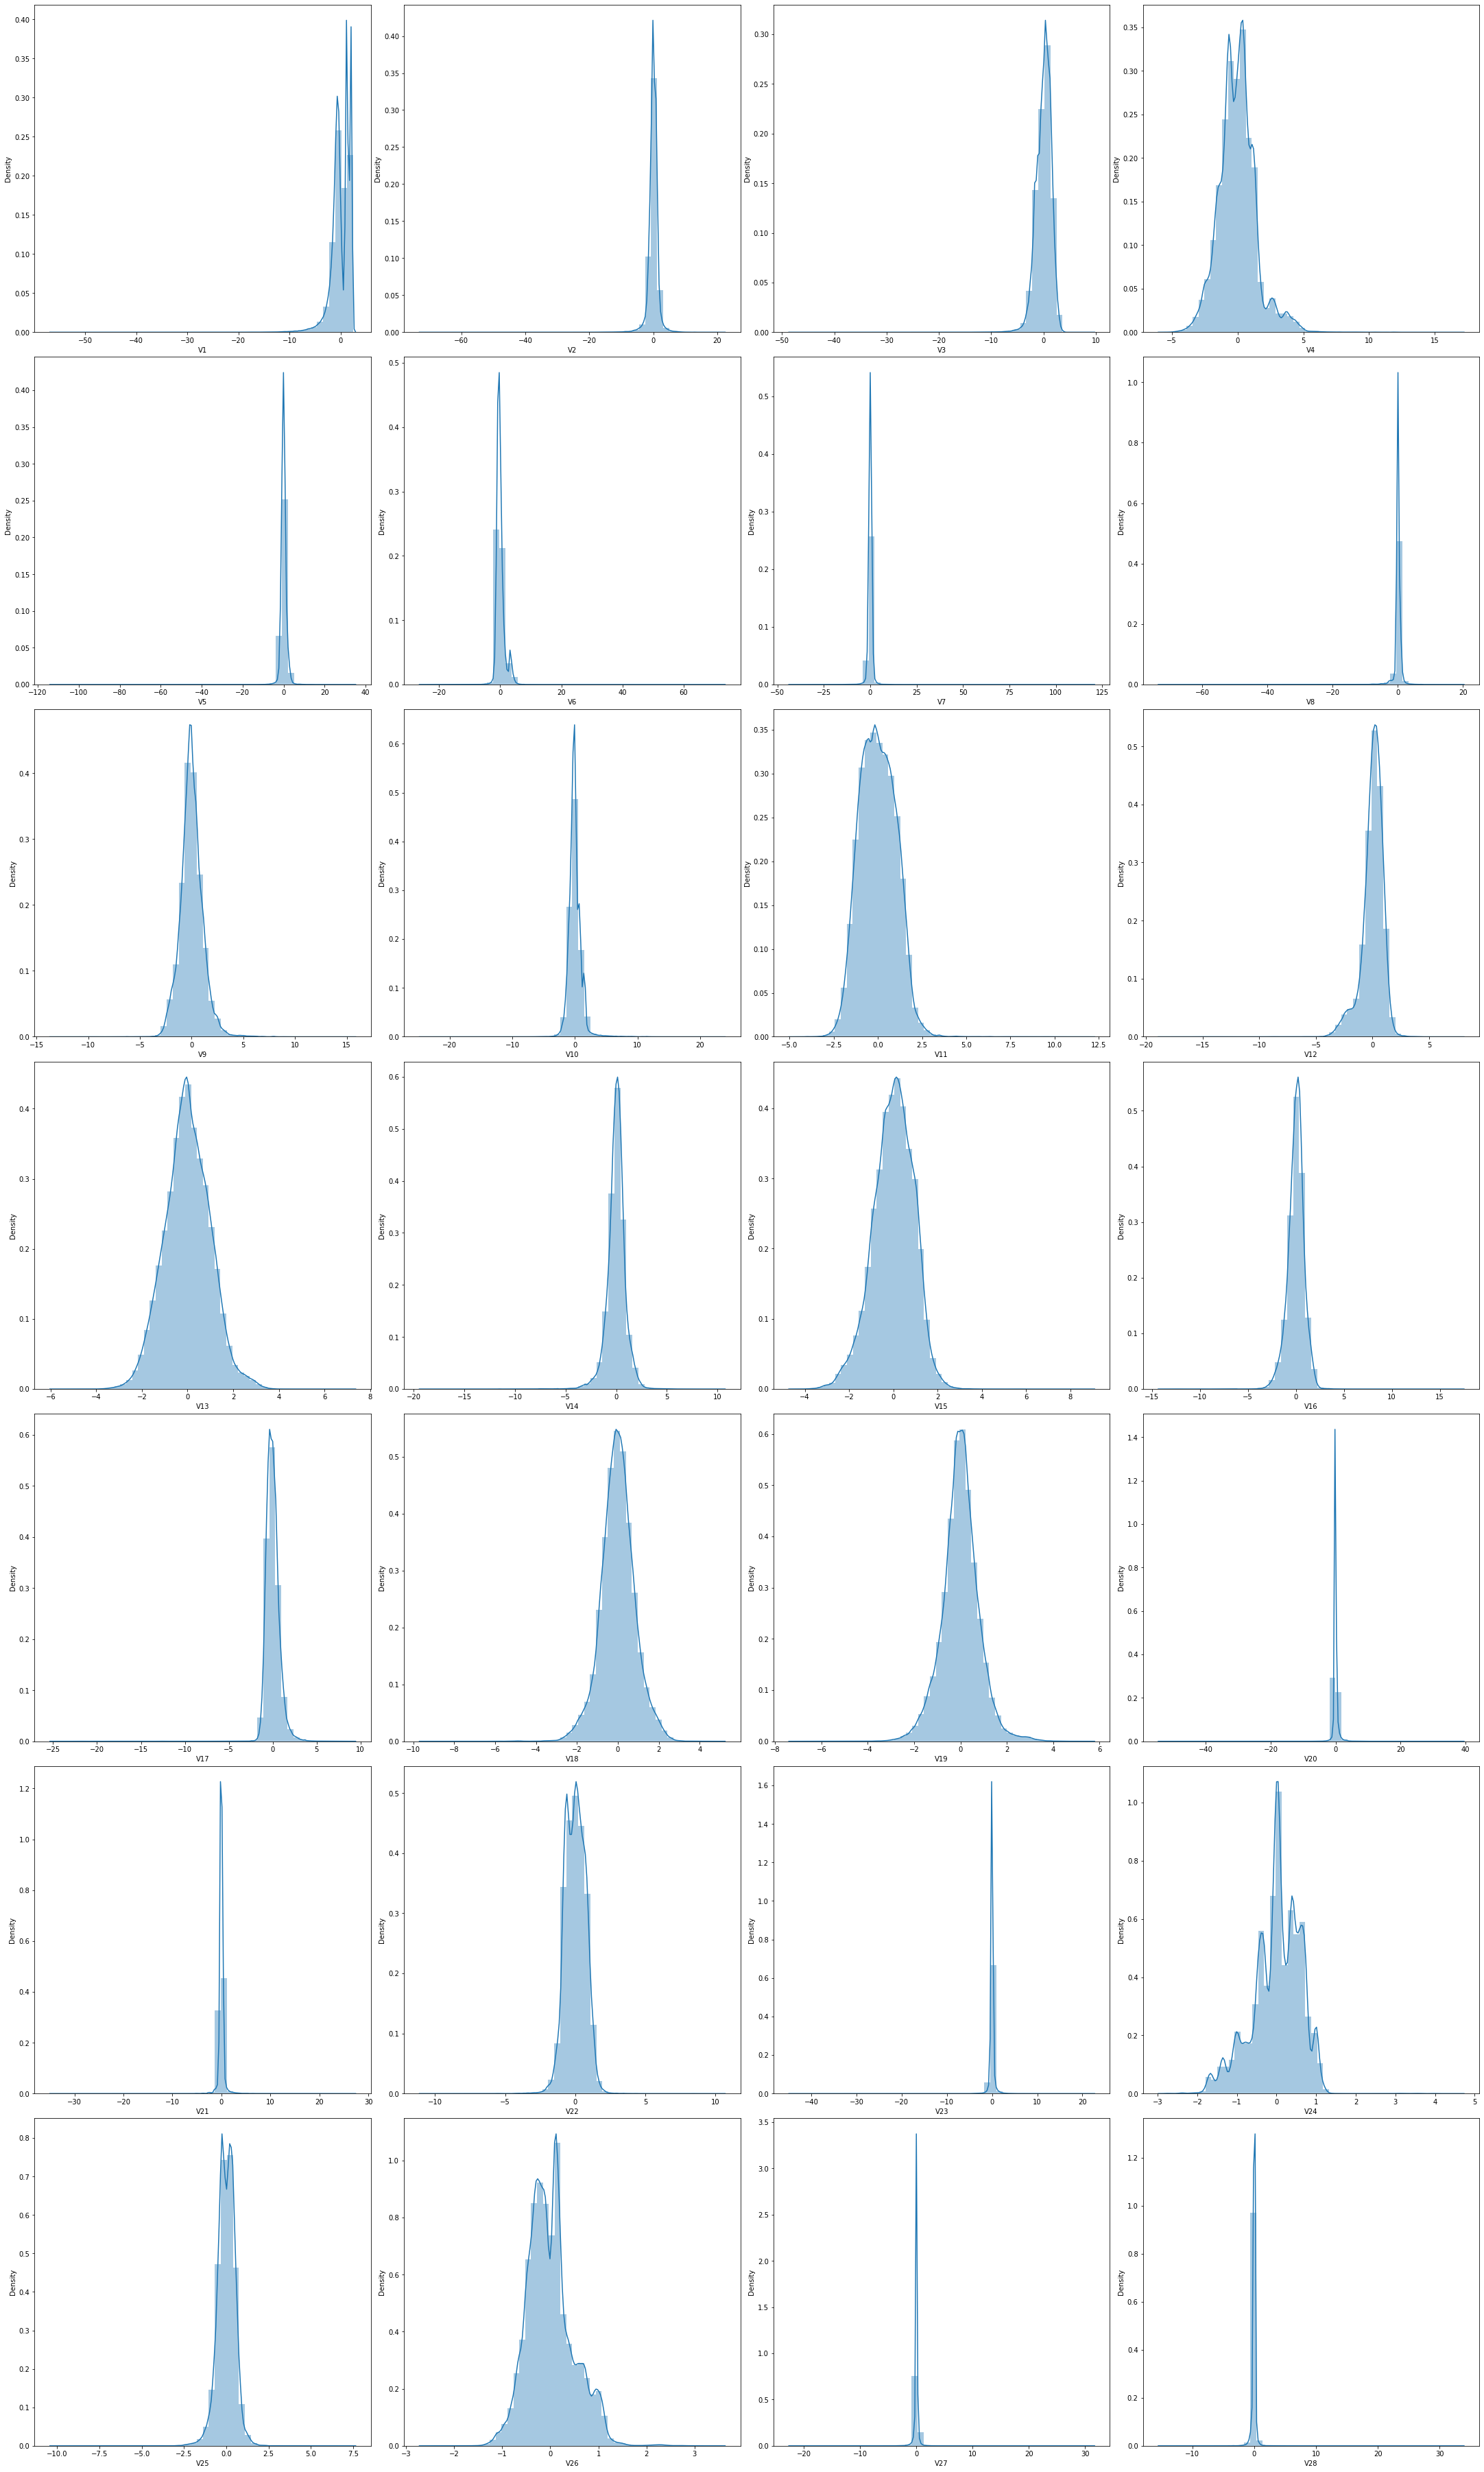

In [8]:
fix,ax = plt.subplots(ncols = 4,nrows = 7,figsize = (30,50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
  sns.distplot(df_temp[col],ax = ax[index])
  index += 1

plt.tight_layout(pad = 0.5,w_pad = 0.5,h_pad = 0.5)

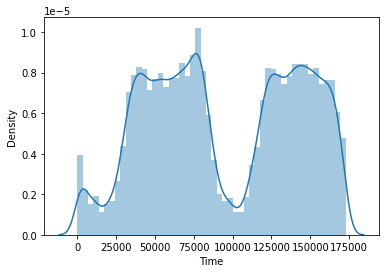

In [9]:
sns.distplot(df['Time'])

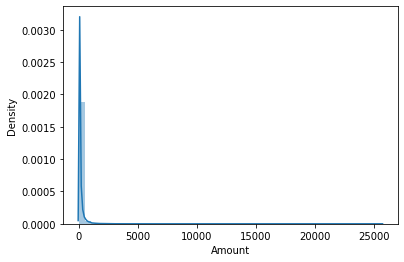

In [10]:
sns.distplot(df['Amount'])

## Correlation Matrix

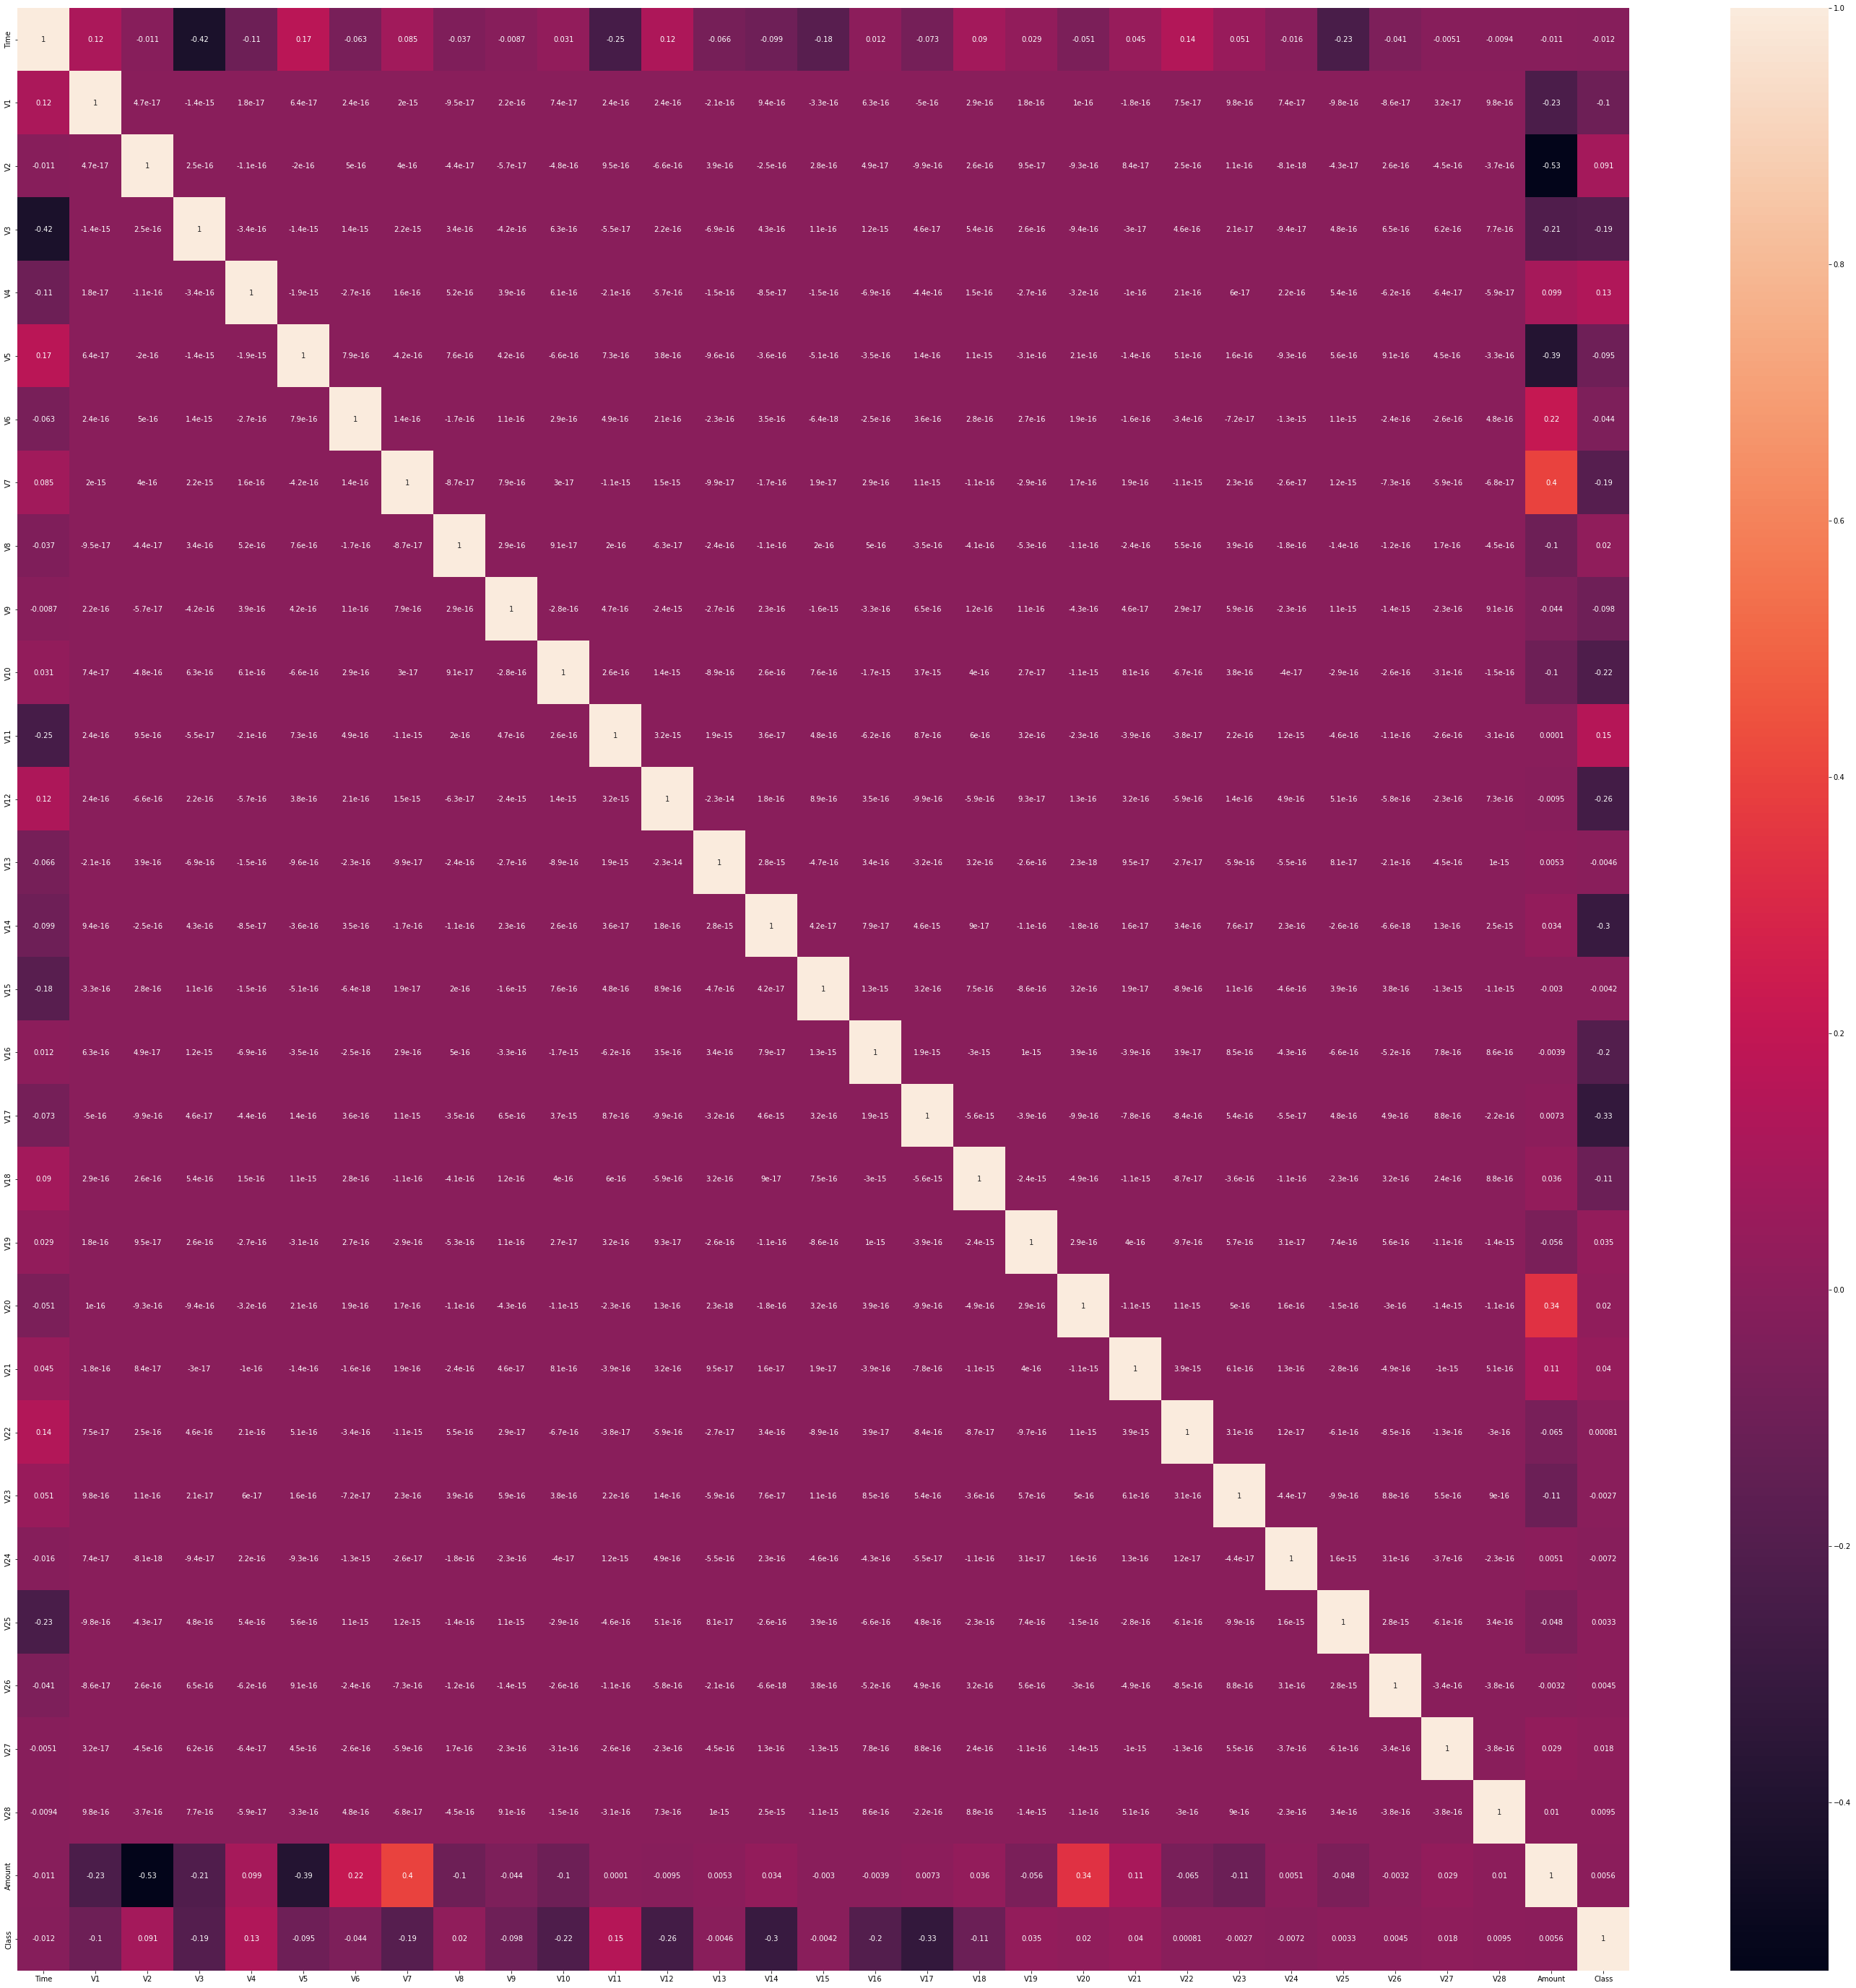

In [11]:
corr = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr,annot = True)

## Input Split

In [12]:
x = df.drop(columns=['Class'],axis=1)
y = df['Class']

## Standard Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [14]:
x_scaled[1]

array([-1.99658302,  0.60849633,  0.16117592,  0.1097971 ,  0.31652293,
        0.04348335, -0.06181997, -0.06370021,  0.07125348, -0.23249419,
       -0.15334963,  1.58000285,  1.06608857,  0.4914182 , -0.14998248,
        0.69436042,  0.52943375, -0.13516997, -0.21876258, -0.17908605,
       -0.08961086, -0.3073768 , -0.88007675,  0.16220118, -0.56113055,
        0.3206939 ,  0.26106948, -0.02225568,  0.04460752, -0.34247454])

## Training the model with imbalanced data.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

#### Logistric Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score:  0.7314285714285713


#### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score:  0.8743169398907105


## Over-sampling the data

In [21]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

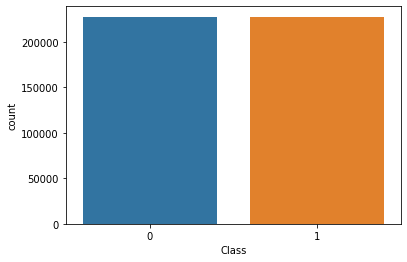

In [22]:
sns.countplot(y_smote)

#### Logistic Regression

In [23]:
model = LogisticRegression()
model.fit(x_smote, y_smote)

LogisticRegression()

In [24]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

F1 Score:  0.10882708585247886


#### Random Forest Classifier

In [25]:
model = RandomForestClassifier()
model.fit(x_smote, y_smote)

RandomForestClassifier()

In [26]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.81      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score:  0.8359788359788359


## Under-sampling the data

In [27]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [28]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [29]:
legit_sample = legit.sample(n=492)

In [30]:
new_df = pd.concat([legit_sample, fraud], axis=0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
93029,64222.0,1.195244,0.054855,0.651221,1.335835,-0.680248,-0.602054,-0.156128,0.019250,0.759697,-0.112579,-1.027483,-0.461212,-1.903554,0.311762,0.029036,-0.204190,0.037818,-0.320912,0.061964,-0.271839,-0.276794,-0.704235,0.050559,0.328998,0.459521,-0.520270,0.026646,0.023251,6.85,0
178663,123722.0,2.095424,-1.066276,-0.456845,-1.347859,-1.303883,-0.915803,-0.820651,-0.198515,0.358212,0.337455,-0.713094,0.655293,1.062265,-0.313028,0.638435,-1.478458,-0.091363,0.689206,-0.433895,-0.490704,-0.595717,-1.122274,0.489054,-0.029785,-0.748134,0.285708,-0.012778,-0.036967,34.00,0
33902,37431.0,-0.281922,0.860789,-0.300428,-1.115974,2.547096,3.267288,0.113401,0.935137,-0.503452,-0.444689,-0.010362,-0.332155,-0.079442,-0.258498,1.097722,0.715303,-0.482422,0.323702,0.282864,0.222837,-0.320113,-1.005984,-0.054444,0.935771,-0.007335,0.088110,0.247856,0.090942,0.89,0
58504,48420.0,-0.762681,-0.469918,1.725121,-2.124343,-1.646425,0.650386,-0.683194,-1.252525,2.140848,-1.868237,0.818870,0.957231,-2.175584,-0.074748,-1.141976,-0.734942,0.426783,-0.097837,-0.076764,-0.602645,1.534465,-0.275633,-0.791577,0.285839,1.458693,0.156532,0.237466,0.097550,200.00,0
148341,89729.0,-0.513134,0.085438,0.186508,-0.427777,1.480623,-0.934898,0.671561,-0.098995,-0.200594,-0.572704,-1.254306,-0.023075,-0.039304,0.237647,-0.393655,-0.075398,-0.513594,-0.513344,0.041264,0.075431,-0.094822,-0.479360,0.279326,0.558670,-0.877181,-0.147309,0.129490,0.236468,25.99,0


1    492
0    492
Name: Class, dtype: int64

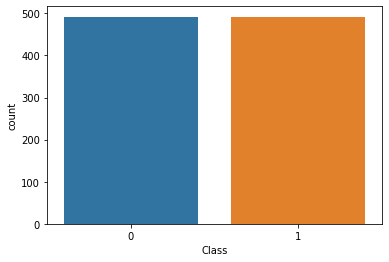

In [31]:
sns.countplot(new_df['Class'])
new_df['Class'].value_counts()

In [32]:
x = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [33]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [34]:
x_scaled[1]

array([ 0.75067939,  0.81811769, -0.79455846,  0.48050587, -1.11101751,
        0.05447843, -0.12654536,  0.33533694, -0.10094215,  0.74649453,
        0.70257247, -0.94879497,  0.81400224,  1.08300867,  0.69329169,
        0.69788102,  0.17373846,  0.53980963,  0.75520031, -0.60092952,
       -0.62183387, -0.34234228, -0.96268336,  0.41881089,  0.05778137,
       -1.14053655,  0.5820823 , -0.09531707, -0.16895713, -0.29021702])

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, stratify=y, random_state=42)

#### Logistic Regression

In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

F1 Score:  0.9538461538461539


#### Random Forest Classifier

In [38]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

F1 Score:  0.9538461538461539
